In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from lbn import LBN, LBNLayer
from sklearn.model_selection import train_test_split
from tensorflow import keras  
from tensorflow.keras import backend as K
from tensorflow.keras import Sequential
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout 
from tensorflow.keras.layers import Activation 
from tensorflow.keras.layers import LeakyReLU  
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.client import device_lib


In [2]:
file_name = "./TRAIN_DATA.pkl"
objects = pd.read_pickle(file_name)
objects

event_number  tau_0_n_charged_tracks     tau_0_pt  tau_0_eta  \
DiBoson   0         51501305                       1    61.196223   0.597434   
          1         51840911                       3    50.513039   0.735092   
          2         51843660                       1    65.117453   0.790218   
          3         51843204                       1    66.388078   1.580813   
          4         51742600                       3    41.767187   0.771101   
...                      ...                     ...          ...        ...   
Hplus3000 3389        119212                       1   596.653438   0.126293   
          3390        110937                       1   258.894719   2.105565   
          3391        119615                       1   621.742500  -0.437455   
          3392        110288                       1  1191.337625  -0.845155   
          3393        119768                       3   752.355750   0.671846   

                tau_0_phi      tau_0_E    lep_0_pt  lep_0_eta  lep_0_phi  \
DiBoson   0     -1.977407    72.446254  301.454469   0.172820  -1.838867   
          1      0.232820    64.786385   64.118320   2.174325   1.505945   
          2     -1.260932    86.528807   53.415461   0.405626  -2.715441   
          3      1.166146   168.118262   90.245320   1.002049  -0.213378   
          4     -2.810712    54.812115   87.059977  -0.170727   0.485725   
...                   ...          ...         ...        ...        ...   
Hplus3000 3389  -1.263547   601.418059   64.177766  -0.198520   2.394535   
          3390   2.336684  1078.752247  221.454000   0.973893  -2.148421   
          3391  -1.300927   682.187816   41.723176  -0.124043  -0.690370   
          3392   0.362451  1642.753473   89.843414   0.188039  -0.349078   
          3393  -2.122138   928.637679   51.295402  -2.115407  -1.871007   

                    lep_0_E  ...       met_et   met_phi    jet_0_pt  \
DiBoson   0    -1429.018434  ...   534.690640 -2.265688  663.821178   
          1      193.673980  ...    63.118486 -0.876949   85.809632   
          2      -82.565721  ...    53.797857 -1.081396   80.877150   
          3     -172.916212  ...   178.463286  0.623175  289.288980   
          4       14.393968  ...   107.690736 -2.699284   36.343672   
...                     ...  ...          ...       ...         ...   
Hplus3000 3389   -90.250865  ...   449.175178  1.876827   86.514969   
          3390   -85.222468  ...   314.546626  0.062025   80.576204   
          3391  -143.414827  ...   908.113473  2.090620  183.566396   
          3392   -12.475519  ...  1359.542498 -2.898113   99.026488   
          3393  -266.834575  ...   930.570381  0.941724  190.064110   

                jet_0_eta  jet_0_phi      jet_0_E    jet_1_pt  tau_0_upsilon  \
DiBoson   0     -1.396944   1.065721  1429.018434  184.642058       0.174792   
          1      0.335477  -3.015623    91.970860    0.000000    -999.000000   
          2      0.149096   2.300846    82.565721   63.739704      -0.415216   
          3      0.390864  -2.675885   312.389695    0.000000       0.510501   
          4     -1.332182  -0.152594    73.937954   35.537092    -999.000000   
...                   ...        ...          ...         ...            ...   
Hplus3000 3389  -0.233460   1.632966    90.250865   45.878381       0.621303   
          3390   0.317162  -2.722354    85.222468   74.464942      -0.103666   
          3391   0.128720  -1.227407   185.459539  129.766914       0.310872   
          3392  -0.303999  -0.974948   103.912057   90.229440      -0.570558   
          3393  -1.583442  -1.398646   482.622774   83.403780    -999.000000   

                  weight  class_label  
DiBoson   0     0.025781          0.0  
          1     0.029348          0.0  
          2     0.008090          0.0  
          3     0.022966          0.0  
          4     0.022252          0.0  
...                  ...          ...  
Hplus3000 3389  0.909109          1.0  
        

In [3]:
objects.keys()

Index(['event_number', 'tau_0_n_charged_tracks', 'tau_0_pt', 'tau_0_eta',
       'tau_0_phi', 'tau_0_E', 'lep_0_pt', 'lep_0_eta', 'lep_0_phi', 'lep_0_E',
       'bjet_0_pt', 'bjet_0_eta', 'bjet_0_phi', 'bjet_0_E', 'met_et',
       'met_phi', 'jet_0_pt', 'jet_0_eta', 'jet_0_phi', 'jet_0_E', 'jet_1_pt',
       'tau_0_upsilon', 'weight', 'class_label'],
      dtype='object')

In [4]:
# df_sig_all = objects[objects.class_label.eq(1)]
# df_sig_all

# df_bkg_all = objects[objects.class_label.eq(0)]
# df_bkg_all

# df_sig = df_sig_all.loc["Hplus200"]
# df_sig

# df_bkg = df_bkg_all.loc["DiBoson"]
# df_bkg

In [5]:
data_subset = [objects.loc["Hplus200"], objects.loc["DiBoson"]]
df = pd.concat(data_subset, ignore_index=True).sample(frac=1).reset_index(drop=True)
df

,event_number,tau_0_n_charged_tracks,tau_0_pt,tau_0_eta,tau_0_phi,tau_0_E,lep_0_pt,lep_0_eta,lep_0_phi,lep_0_E,...,met_et,met_phi,jet_0_pt,jet_0_eta,jet_0_phi,jet_0_E,jet_1_pt,tau_0_upsilon,weight,class_label
0,41477076,1,49.006922,-0.417727,-2.547433,53.345207,89.086266,0.212644,0.960902,-143.571501,...,67.639293,0.632773,74.887416,1.265970,-2.537924,143.571501,41.243613,0.906781,0.023369,0.0
1,73906,3,43.815730,2.014365,-1.101382,167.143225,45.037328,-2.374080,0.315892,65.006265,...,122.042606,2.566421,92.469096,-1.272469,-1.273482,178.966003,0.000000,-999.000000,0.347678,1.0
2,118180,1,101.252313,0.277308,1.277355,105.170460,65.858297,-1.182467,2.268426,-19.596351,...,112.157357,-0.706500,109.522869,-0.689452,-2.277464,137.118317,0.000000,0.960497,0.444593,1.0
3,118539,3,54.373195,-1.338268,2.364451,110.778175,67.175328,-0.395249,-2.031310,-58.701081,...,129.326077,-0.156191,64.495082,-0.805740,-2.819091,87.486263,50.764179,-999.000000,0.343724,1.0
4,113044,1,80.867695,0.299092,0.155215,84.511780,113.033094,0.425935,1.400713,63.600040,...,91.745211,-1.892411,78.050564,-0.126135,-2.012057,79.431058,33.252541,0.750075,-0.363363,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7428,108191,3,58.438785,-0.018371,-0.759612,58.448647,50.028059,-0.604643,0.266103,-38.527912,...,108.292850,-2.353360,91.578123,-0.357292,1.828653,97.983056,0.000000,-999.000000,-0.444033,1.0
7429,89844,1,64.718059,0.341472,-3.087223,68.528020,72.016531,1.113431,0.244199,-258.224529,...,141.621324,-1.691936,133.211825,1.278029,1.432364,258.224529,0.000000,-0.156283,0.354730,1.0
7430,106975,1,85.523086,0.677236,-0.181792,105.896779,82.869344,-0.854077,1.763873,-65.731131,...,143.689021,-2.208870,55.137715,-1.854486,1.257244,180.707427,0.000000,-0.639089,-0.329640,1.0
7431,76915,1,113.471125,0.037014,-1.160317,113.548863,55.584922,-0.586063,-1.906093,-50.245205,...,113.899678,1.083237,100.438473,-0.537492,2.442399,115.652449,0.000000,0.389421,0.379764,1.0


In [6]:
N_Train = 5000
N_Max = 7433

VarNames=['event_number', 'tau_0_n_charged_tracks', 'tau_0_pt', 'tau_0_eta', 'tau_0_phi', 'tau_0_E', 'lep_0_pt', 'lep_0_eta', 'lep_0_phi', 'lep_0_E', 'bjet_0_pt', 'bjet_0_eta', 'bjet_0_phi', 'bjet_0_E', 'met_et', 'met_phi', 'jet_0_pt', 'jet_0_eta', 'jet_0_phi', 'jet_0_E', 'jet_1_pt', 'tau_0_upsilon', 'weight', 'class_label']

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:-1]])
Y_Train=np.array(Train_Sample["class_label"])

X_Test=np.array(Test_Sample[VarNames[1:-1]])
Y_Test=np.array(Test_Sample["class_label"])

In [7]:
# Train_Sample
# Test_Sample
# len(PtEtaPhiE)
# X_Train
# Y_Train
# X_Test
# Y_Test
# result = np.where(Y_Test == 1)

# print('Tuple of arrays returned : ', result)
# print("Elements with value 1 exists at following indices", result[0], sep='\n')

Tuple of arrays returned :  (array([   0,    1,    2, ..., 2430, 2431, 2432], dtype=int64),)
Elements with value 1 exists at following indices
[   0    1    2 ... 2430 2431 2432]


In [8]:
Keras_model = Sequential()
Keras_model.add(BatchNormalization(input_shape=(X_Train.shape[1],)))
Keras_model.add(Dense(64, activation="sigmoid"))
Keras_model.add(Dropout(0.1)) 
Keras_model.add(Dense(64, activation="sigmoid"))
Keras_model.add(Dropout(0.1)) 
Keras_model.add(Dense(64, activation="sigmoid"))
Keras_model.add(Dropout(0.1)) 
Keras_model.add(Dense(64, activation="sigmoid"))
Keras_model.add(Dropout(0.1)) 
Keras_model.add(Dense(1,activation="sigmoid"))

In [9]:
Keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 22)                88        
_________________________________________________________________
dense (Dense)                (None, 64)                1472      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [10]:
Keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=Keras_model.fit(X_Train, Y_Train, validation_data=(X_Test,Y_Test), epochs=100, batch_size=50)

Epoch 1/100
100/100 [==============================] - 3s 10ms/step - loss: 0.6976 - accuracy: 0.5674 - val_loss: 0.6696 - val_accuracy: 0.6025
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6639 - accuracy: 0.6002 - val_loss: 0.6173 - val_accuracy: 0.6885
Epoch 3/100
100/100 [==============================] - 0s 5ms/step - loss: 0.5740 - accuracy: 0.7116 - val_loss: 0.5470 - val_accuracy: 0.7148
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.5325 - accuracy: 0.7328 - val_loss: 0.5247 - val_accuracy: 0.7320
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.5203 - accuracy: 0.7444 - val_loss: 0.5210 - val_accuracy: 0.7390
Epoch 6/100
100/100 [==============================] - 0s 5ms/step - loss: 0.5139 - accuracy: 0.7438 - val_loss: 0.5132 - val_accuracy: 0.7386
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 0.5116 - accuracy: 0.7510 - val_loss: 0.5085 - val_accuracy: 0.744

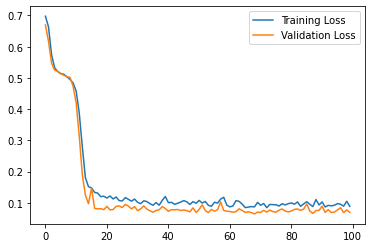

In [11]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

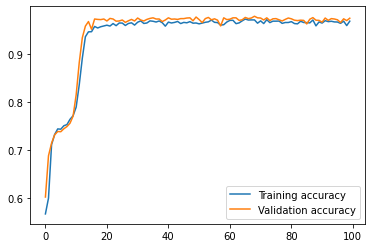

In [12]:
plt.plot(range(len(history.history["accuracy"])),history.history["accuracy"],label="Training accuracy")
plt.plot(range(len(history.history["val_accuracy"])),history.history["val_accuracy"],label="Validation accuracy")
plt.legend()

In [13]:
scores = Keras_model.evaluate(X_Test, Y_Test)
print(scores)

77/77 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.9749
[0.06888679414987564, 0.974928081035614]


In [14]:
Keras_model.predict(X_Test)

array([[0.99974555],
       [0.99974245],
       [0.999625  ],
       ...,
       [0.9997686 ],
       [0.99974227],
       [0.722712  ]], dtype=float32)

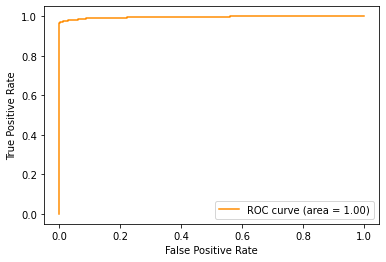

In [15]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_Test, Keras_model.predict(X_Test))
                        
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
df2 = pd.read_csv('EPxPyPz.csv', header=None, names=df2variables)
df2